## Average Player Positions

In [19]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import requests
import json
import pandas as pd

In [29]:
#firstmatchId = 11873897
#lastmatchId = 12198161
#matchId = 12198234
def scrape_sofascore_average_positions(matchId):
    response1 = requests.get(f'https://www.sofascore.com/api/v1/event/{matchId}/average-positions')
    response2 = requests.get(f'https://www.sofascore.com/api/v1/event/{matchId}/lineups')
    data1 = response1.json()
    data2 = response2.json()
    return data1,data2

In [113]:
mi = 11874031
data1,data2 = scrape_sofascore_average_positions(mi)

In [134]:
df_away_pos = pd.json_normalize(data1['away'])
df_away_lineup = pd.json_normalize(data2['away']['players'])

In [135]:
final_df = df_away_pos.merge(df_away_lineup,on='player.name',how='left')

In [136]:
df = final_df[['player.name','shirtNumber','averageX', 'averageY','substitute','player.country.name']]

In [137]:
df.head()

,player.name,shirtNumber,averageX,averageY,substitute,player.country.name
0,Giorgi Chakvetadze,10,34.975758,69.627273,False,Georgia
1,Sandro Altunashvili,18,33.138889,23.144444,True,Georgia
2,Otar Kiteishvili,17,27.754839,54.703226,False,Georgia
3,Giorgi Tsitaishvili,21,34.614286,90.528571,True,Georgia
4,Georges Mikautadze,22,51.575000,49.489286,False,Georgia


In [138]:
def plot_average_positions(df):
    FIGWIDTH = 16
    FIGHEIGHT = 9
    NROWS = 1
    NCOLS = 1
    SPACE = 0.09
    MAX_GRID = 0.95

    pitch = VerticalPitch(pitch_type='opta',pad_top=1, pad_bottom=1,
                      pad_left=1, pad_right=1,pitch_color='grass', line_color='white',stripe=True,
                      line_alpha=0.5, goal_alpha=0.8,corner_arcs=False,goal_type='circle')
    GRID_WIDTH, GRID_HEIGHT = pitch.grid_dimensions(figwidth=FIGWIDTH, figheight=FIGHEIGHT,
                                                nrows=NROWS, ncols=NCOLS,
                                                max_grid=MAX_GRID, space=SPACE)
    TITLE_HEIGHT = 0.1
    ENDNOTE_HEIGHT = MAX_GRID - (GRID_HEIGHT + TITLE_HEIGHT)

    fig, axs = pitch.grid(figheight=FIGHEIGHT, grid_width=GRID_WIDTH, grid_height=GRID_HEIGHT,
                     space=SPACE, ncols=NCOLS, nrows=NROWS, title_height=TITLE_HEIGHT,
                     endnote_height=ENDNOTE_HEIGHT, axis=False)
    fig.set_facecolor("#4e943a")
    # title text
    #country = df['player.country.name'].unique()
    team1 = 'Spain'
    team2 = 'Georgia'
    axs['title'].text(0.5, 0.65, "Georgia's Average Positions", fontsize=25,va='center', ha='center',color='white')
    axs['title'].text(0.5, 0.2, "Against Spain", fontsize=25,va='center', ha='center',color='white')

    for index,row in df.iterrows():
        if row['substitute'] == False:
            pitch.scatter(row['averageX'], row['averageY'], color='white', s=1000, edgecolor='white', linewidth=2, alpha=0.9,marker='o',ax=axs['pitch'])
            pitch.annotate(row['shirtNumber'],xy = (row['averageX'],row['averageY']), ha='center', va='center',fontsize=15,ax=axs['pitch'])
    
    plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/MatchReports/EUROS-24/{team1}V{team2}/{team2}_AvgPos.png',dpi=500,bbox_inches = 'tight')

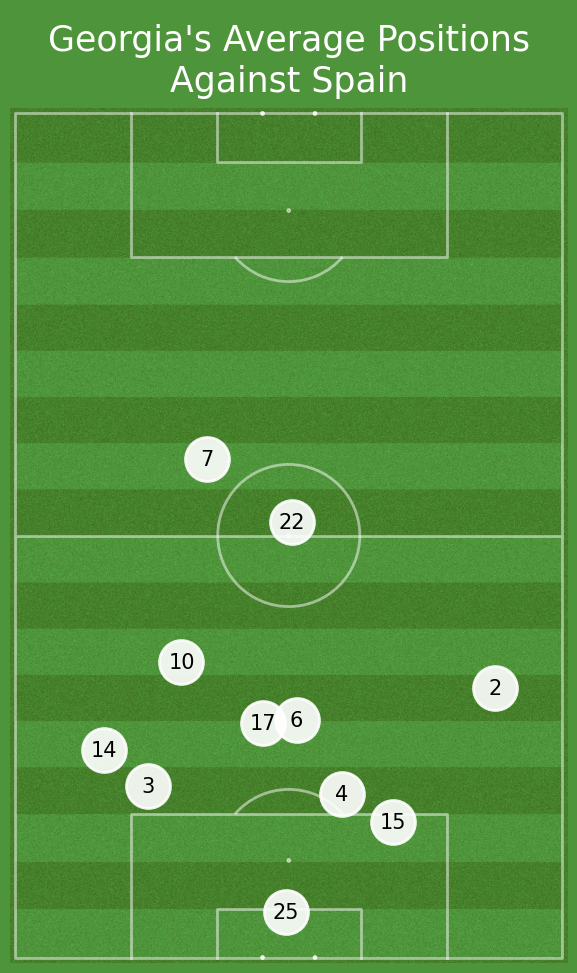

In [139]:
plot_average_positions(df)